# TASK #1 UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


In [53]:
from google.colab import files
uploaded = files.upload()

Saving happiness_report.csv to happiness_report.csv


In [54]:
!pip install numpy seaborn pandas matplotlib scikit-learn plotly bubbly chart_studio


# TASK #2: IMPORT DATASETS AND LIBRARIES

In [55]:
# Get the required dependencies
! pip install bubbly # for bubble charts
#! pip install iplot ##iplot installed ahead from the plotly package
! pip install chart_studio

In [56]:
import pandas as pd # for dataframe manipulation
import numpy as np # package for multidimential array manipulation
import seaborn as sns #data visialization
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px # package for perform interactive data visualization
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot

In [57]:
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly in dark background
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.


In [58]:
# Import csv file into pandas dataframe
happy_df = pd.read_csv('happiness_report.csv')

In [59]:
# print the first 5 rows of the dataframe
happy_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


MINI CHALLENGE #1:
- Find out how many samples exist in the DataFrame using two different methods.
- Select your own country from the dataframe and explore scores. Perform sanity check.

In [60]:
# method 1
num_samples = happy_df.shape[0]
print(num_samples)
# method 2
num_samples2 = len(happy_df)
print(num_samples2)
my_country = happy_df[happy_df['Country or region'] == 'United States']
print(my_country)

156
156
    Overall rank Country or region  Score  GDP per capita  Social support  \
18            19     United States  6.892           1.433           1.457   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
18                    0.874                         0.454        0.28   

    Perceptions of corruption  
18                      0.128  


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [61]:
# Check the number of non-null values in the dataframe
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [62]:
# Check Null values
happy_df.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


In [63]:
# Obtain the Statistical summary of the dataframe
# ex: std, mean, etc
happy_df.describe()


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [64]:
# check the number of duplicated entries in the dataframe
 # since there are no duplicates, no further action is required

happy_df.duplicated().sum()

np.int64(0)

MINI CHALLENGE #2:
- What is the country that has the maximum happiness score? What is the perception of corruption in this country?

In [65]:
print(max(happy_df['Score'])) # find max score
# find country of max score
happy_df.loc[happy_df['Score'] == max(happy_df['Score']), 'Country or region']
happy_df[happy_df['Score'] == max(happy_df['Score'])]


7.769


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


# TASK #4: PERFORM DATA VISUALIZATION - PART #1

<Figure size 2000x2000 with 0 Axes>

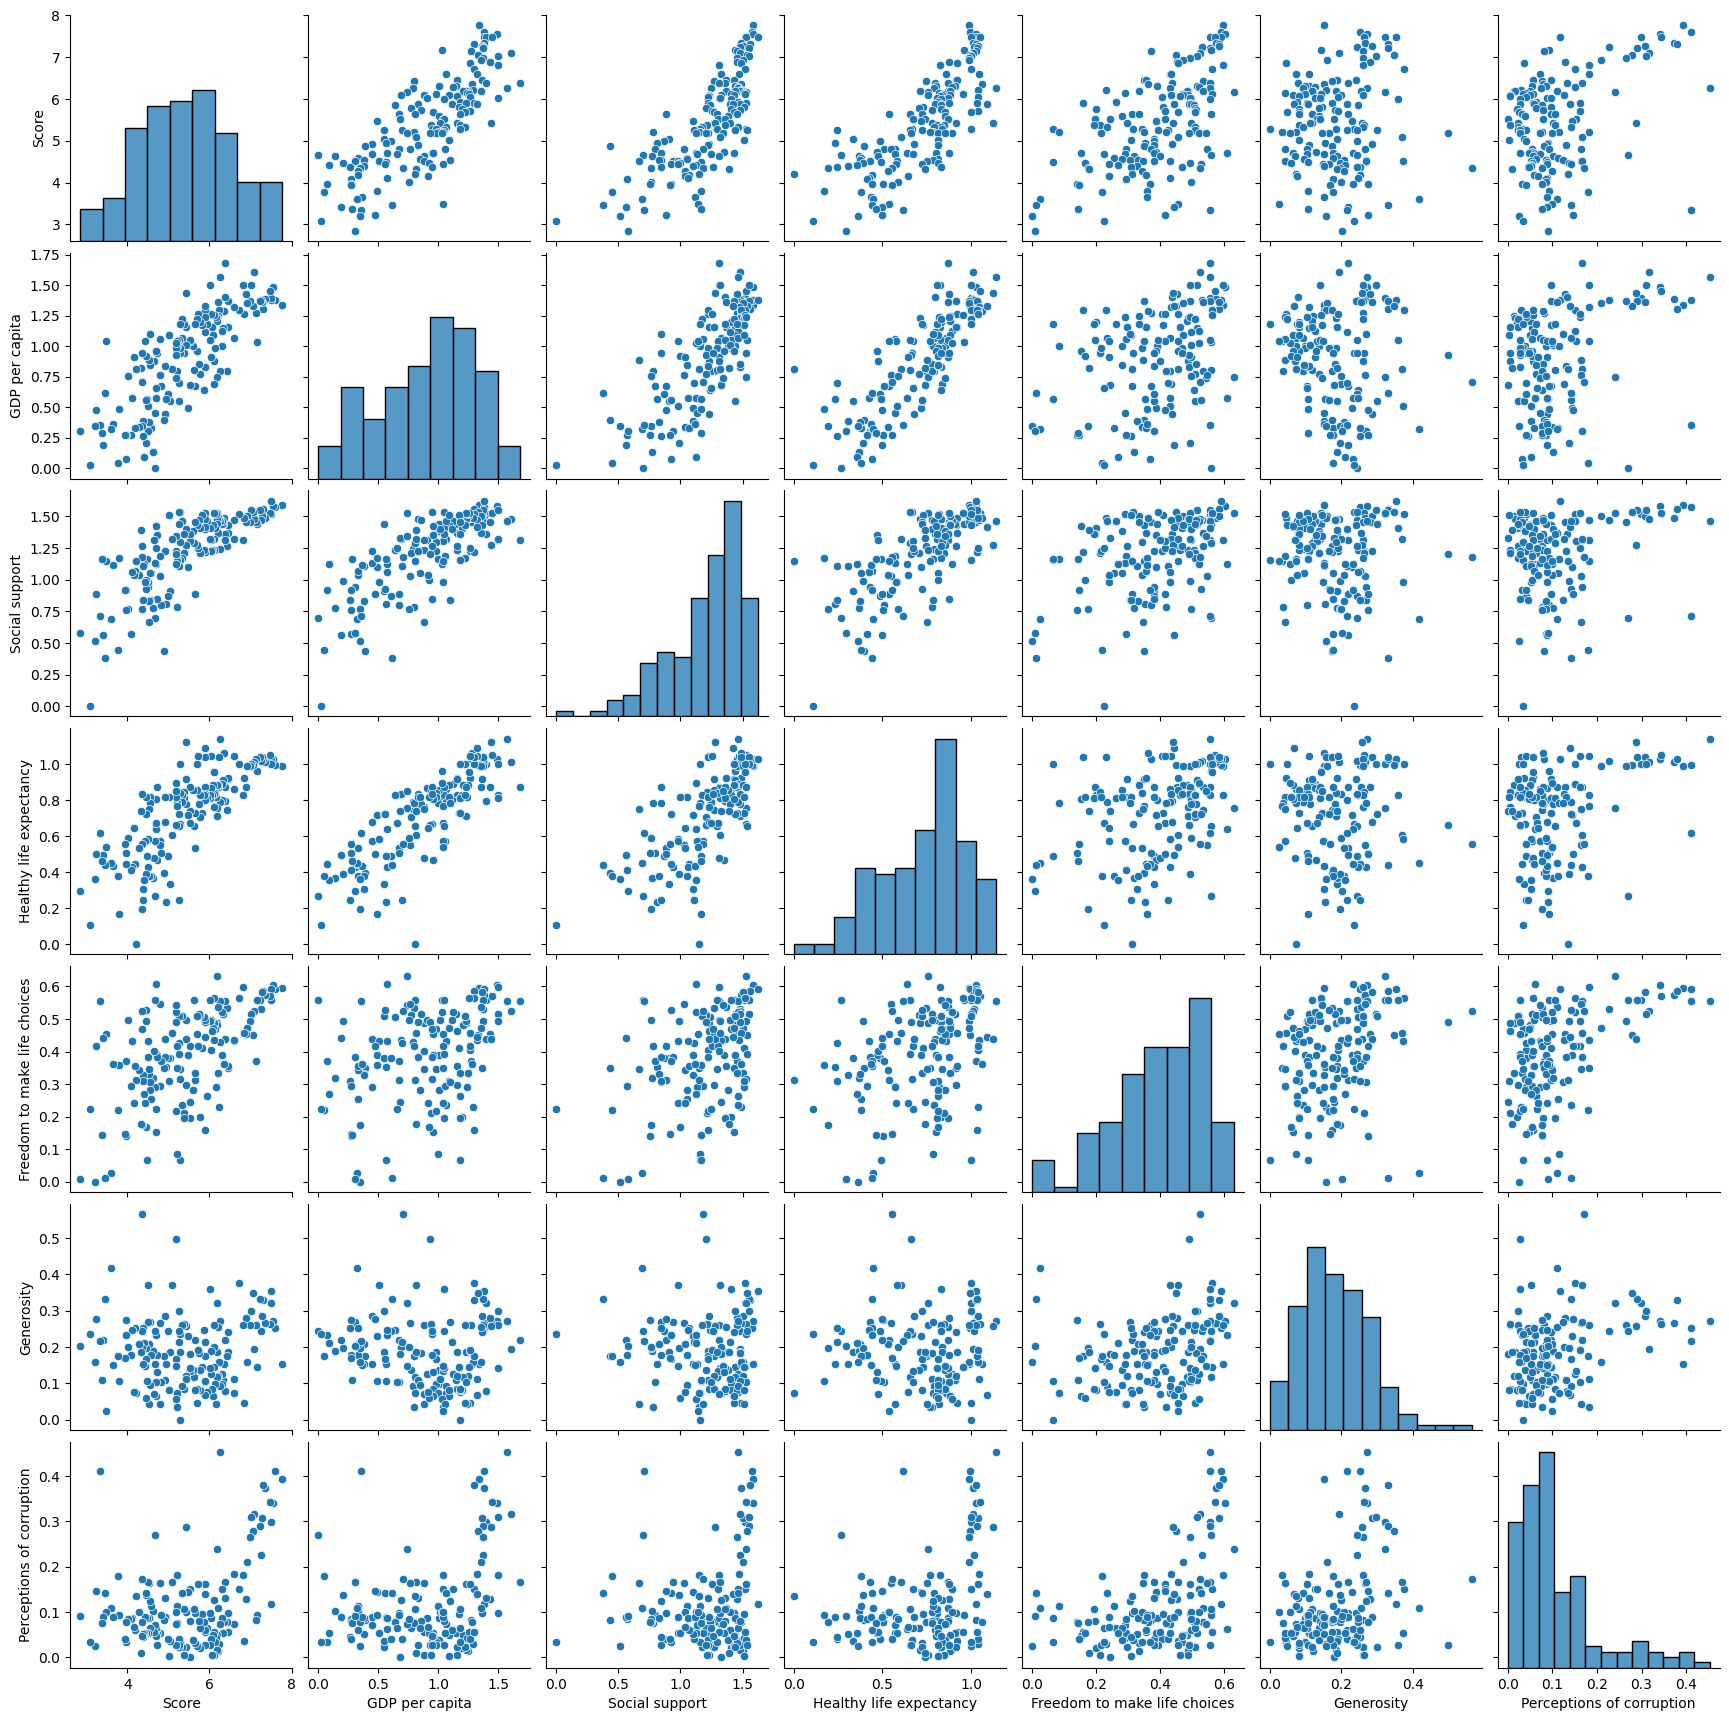

In [66]:
# Plot the pairplot, because it gives summary of all info versus eachother
fig = plt.figure(figsize = (20,20))
sns.pairplot(happy_df[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']])


# Positive correlation between GDP and score
# Positive correlation between Social Support and score


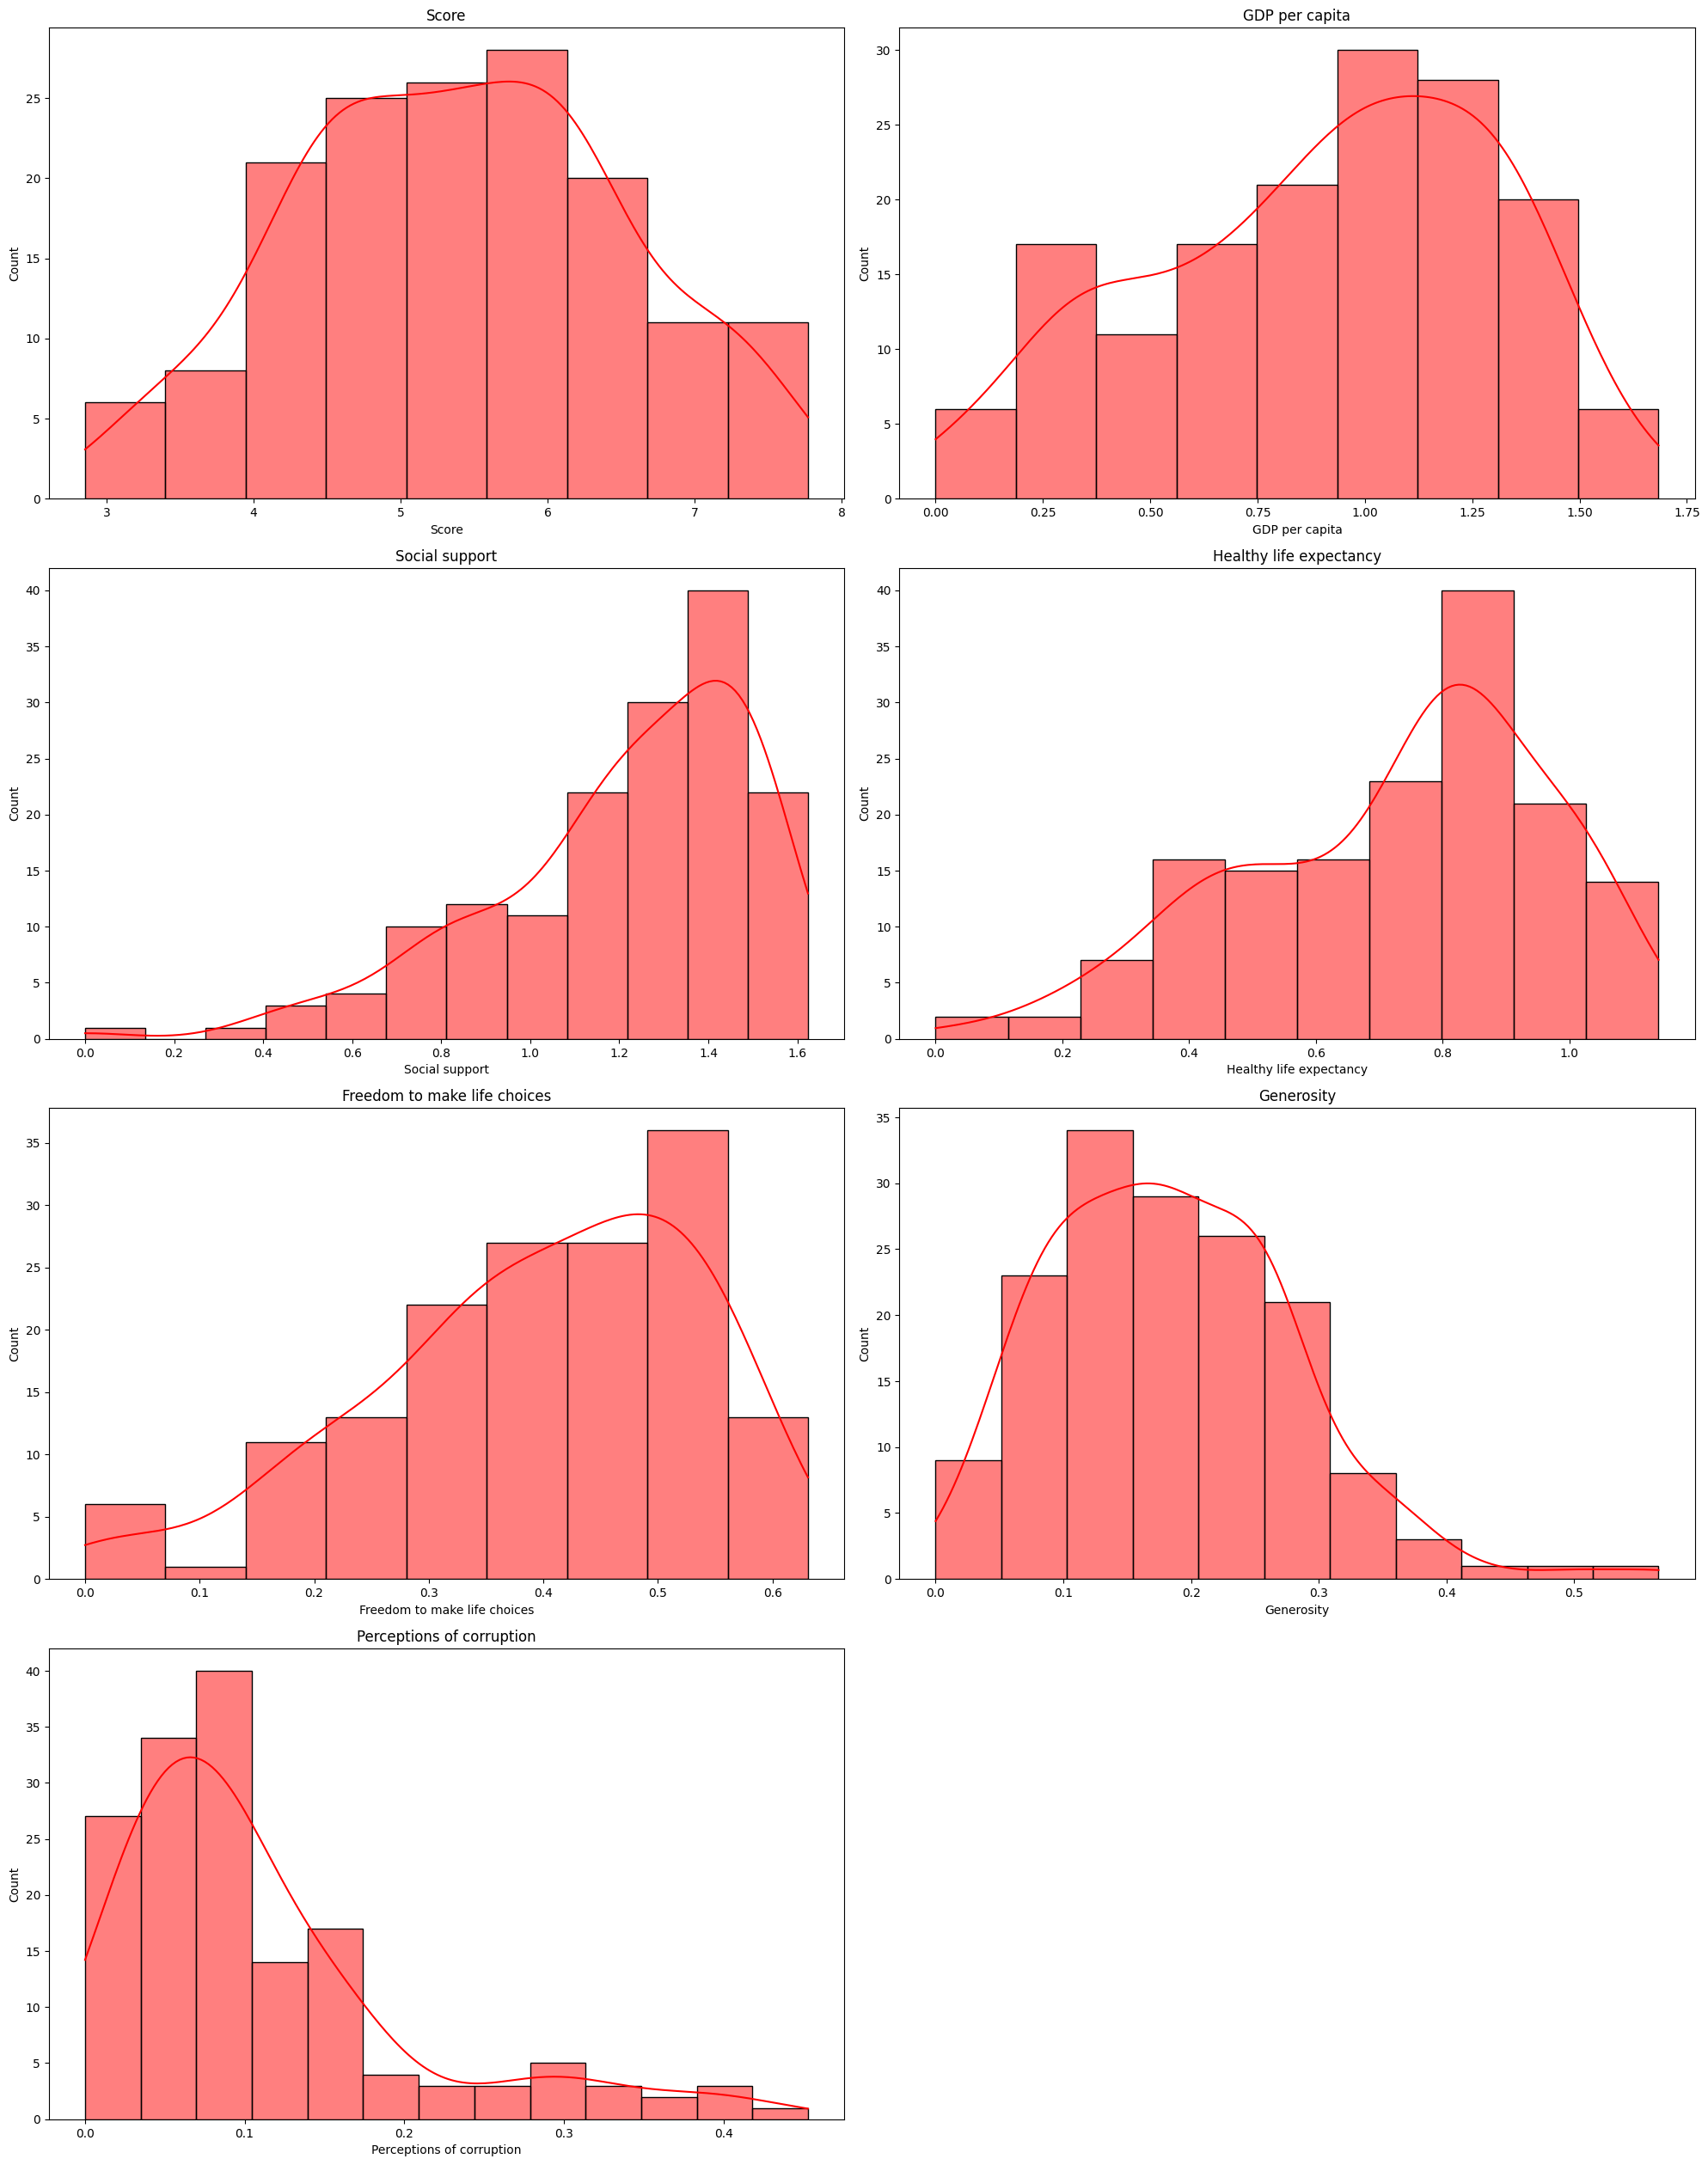

In [67]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
columns = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy',
    'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
plt.figure(figsize = (20, 50))
for i in range(len(columns)): # for each col
  plt.subplot(8, 2, i+1) # create a sub-plot
  sns.histplot(happy_df[columns[i]], kde=True, color='r');
  plt.title(columns[i])

plt.tight_layout()

MINI CHALLENGE #3:
- Plot the correlation matrix and comment on the results.


<Axes: >

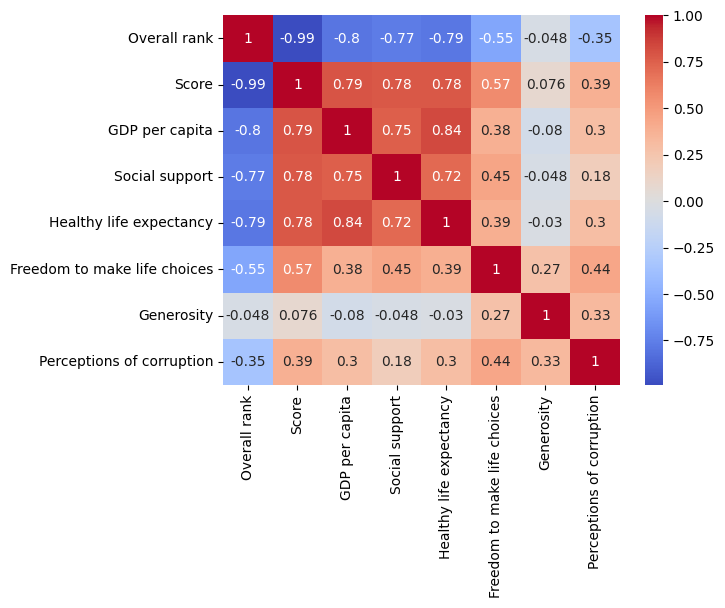

In [68]:
corr_matrix = happy_df.drop(columns=['Country or region']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#sns.heatmap(corr_matrix, annot = True)

# TASK #5: PERFORM DATA VISUALIZATION - PART #2

In [69]:
# Plot the relationship between score, GDP and region
# plot interactive plot
fig = px.scatter(happy_df, x = 'GDP per capita', y = 'Score', text = 'Country or region')
fig.show()

In [70]:
# Plot the relationship between score and GDP (while adding color and size)

fig.update_layout(title_text = 'Happiness Score vs GDP per Capita')
fig.show()

In [71]:
# Plot the relationship between score and freedom to make life choices

fig = px.scatter(happy_df, x = 'Freedom to make life choices', y = "Score", size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(title_text = 'Happiness Score vs Freedom to make life choices')
fig.show()

MINI CHALLENGE #4:
- Plot a similar type of plots for 'Healthy life expectancy' and 'Score'

In [72]:
fig = px.scatter(happy_df, x = 'Healthy life expectancy', y = 'Score', text = 'Country or region')
fig.show()

fig2 = px.scatter(happy_df, x = 'Healthy life expectancy', y = "Score", size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")
fig2.show()

# TASK #6: PREPARE THE DATA TO FEED THE CLUSTERING MODEL

In [73]:
# create clusters without the use of happiness score and rank to see which countries fall under similar clusters
df_seg = happy_df.drop(columns = ['Overall rank', 'Country or region', 'Score'])
df_seg

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411
152,0.476,0.885,0.499,0.417,0.276,0.147
153,0.350,0.517,0.361,0.000,0.158,0.025
154,0.026,0.000,0.105,0.225,0.235,0.035


In [74]:
# Select the data without rank and happiness score


In [75]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_seg)

scaled_data.shape


(156, 6)

# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND K-MEANS CLUSTERING ALGORITHM

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK #8: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source:
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

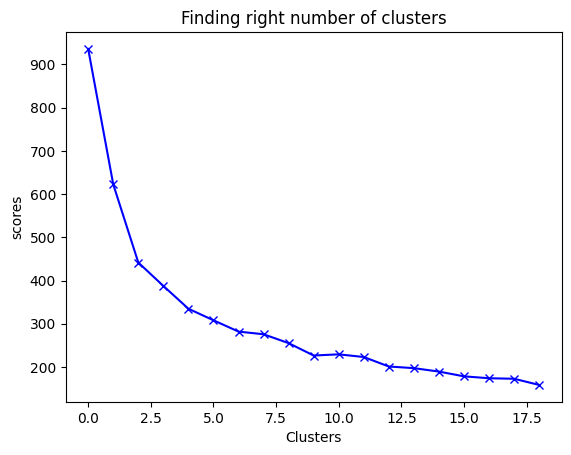

In [76]:
# create a placeholder
scores = []
range_values = range(1, 20)

for i in range_values:
    #from scikitlearn
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_data)
     # append WCSS to score placeholder we defined above
    scores.append(kmeans.inertia_)
plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

In [77]:
# From this we can observe that 3rd cluster seems to be forming the elbow of the curve.
# Let's choose the number of clusters to be 3.

# TASK #9: APPLY K-MEANS METHOD

In [78]:
kmeans = KMeans(3)
kmeans.fit(scaled_data)


KMeans(n_clusters=3)

In [79]:
labels = kmeans.labels_

In [80]:
kmeans.cluster_centers_.shape

(3, 6)

In [81]:
# all centers for clusters
kmeans.cluster_centers_

array([[ 1.23376112,  0.95932021,  1.09897777,  1.08730398,  0.94812737,
         1.81007629],
       [-1.11583287, -1.06985591, -1.13080748, -0.4158626 ,  0.38968433,
        -0.08455462],
       [ 0.36600992,  0.41442151,  0.41389506, -0.04176711, -0.51938907,
        -0.4596903 ]])

In [82]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_seg.columns])
cluster_centers

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.233761,0.959320,1.098978,1.087304,0.948127,1.810076
1,-1.115833,-1.069856,-1.130807,-0.415863,0.389684,-0.084555
2,0.366010,0.414422,0.413895,-0.041767,-0.519389,-0.459690


In [83]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_seg.columns])
cluster_centers


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.395087,1.494913,0.990478,0.547870,0.274870,0.281174
1,0.462038,0.889750,0.452327,0.333173,0.221846,0.102635
2,1.050494,1.332407,0.825136,0.386605,0.135531,0.067284


- Cluster 0: countries that have GDP in the range of 0.6 to 1.4 and have high social support. These countries have medium life expectancy and have high freedom to make life choices. These counties have low generosity and low perception of corruption.

- Cluster 1: countries that have very high GDP, high social support and high life expectancy. These counties have high freedom to make life choices, medium generosity and medium perception of corruption.

- Cluster 2: countries that have low GDP average life expectancy and average social support. These counties have low freedom to make life choices, high generosity and medium perception of corruption.

In [84]:
labels.shape # Labels associated to each data point

(156,)

In [85]:
labels.max()

np.int32(2)

In [86]:
labels.min()

np.int32(0)

In [87]:

y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [88]:
# concatenate the clusters labels to our original dataframe
happy_df_cluster = pd.concat([happy_df, pd.DataFrame({'cluster':labels})], axis = 1)
happy_df_cluster

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,1
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,1
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,1
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,1


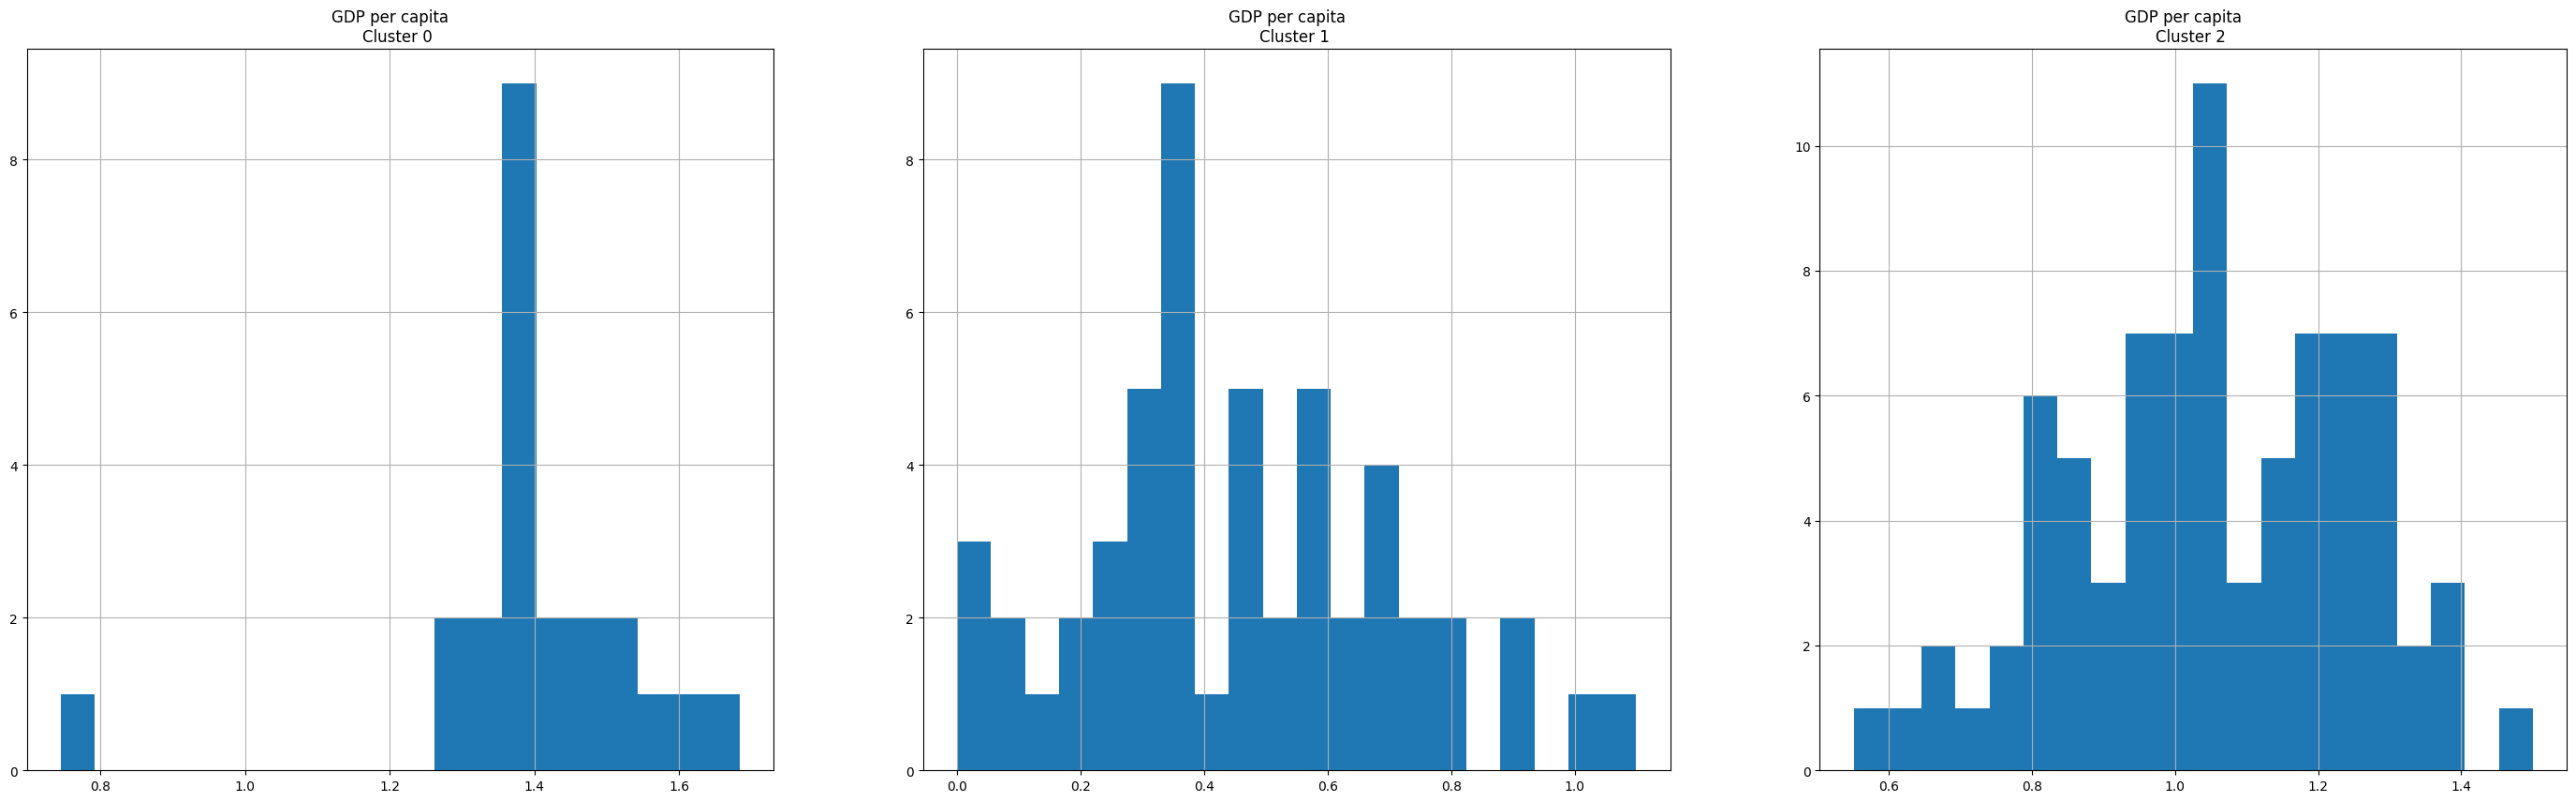

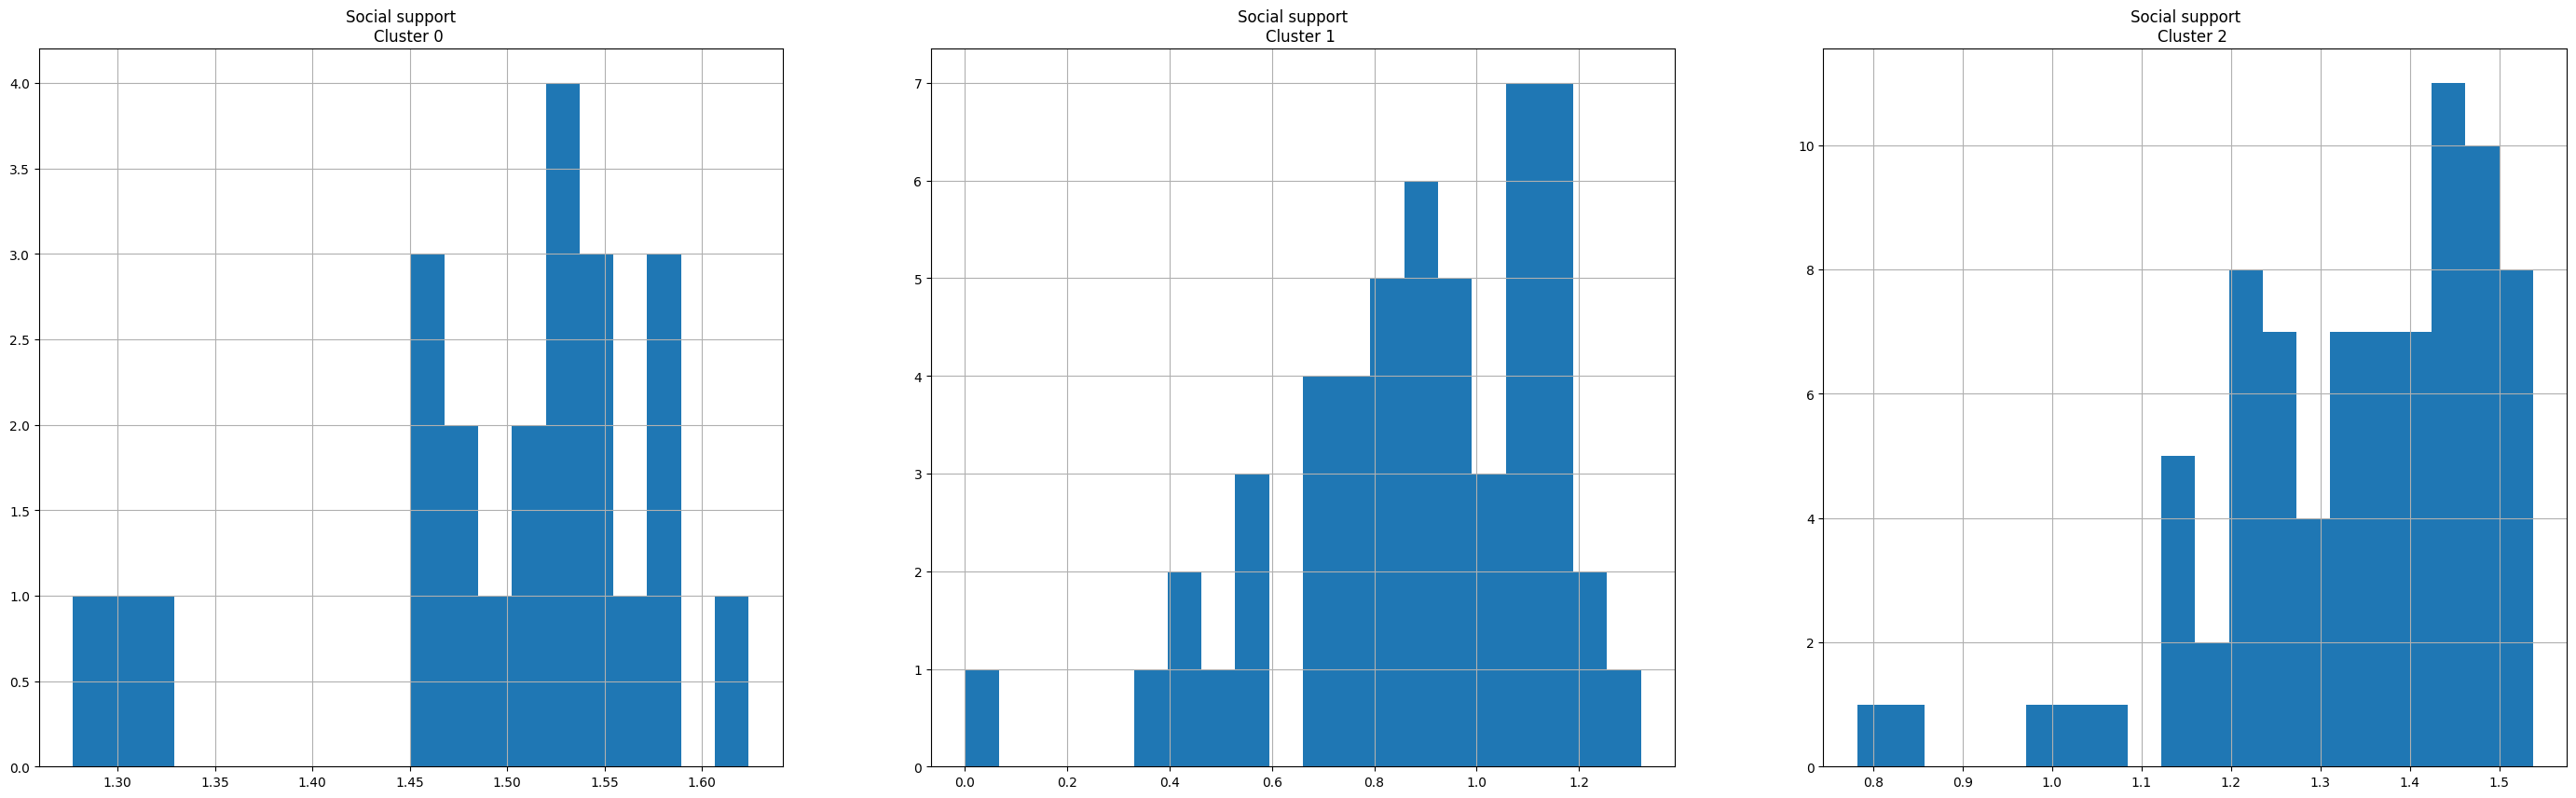

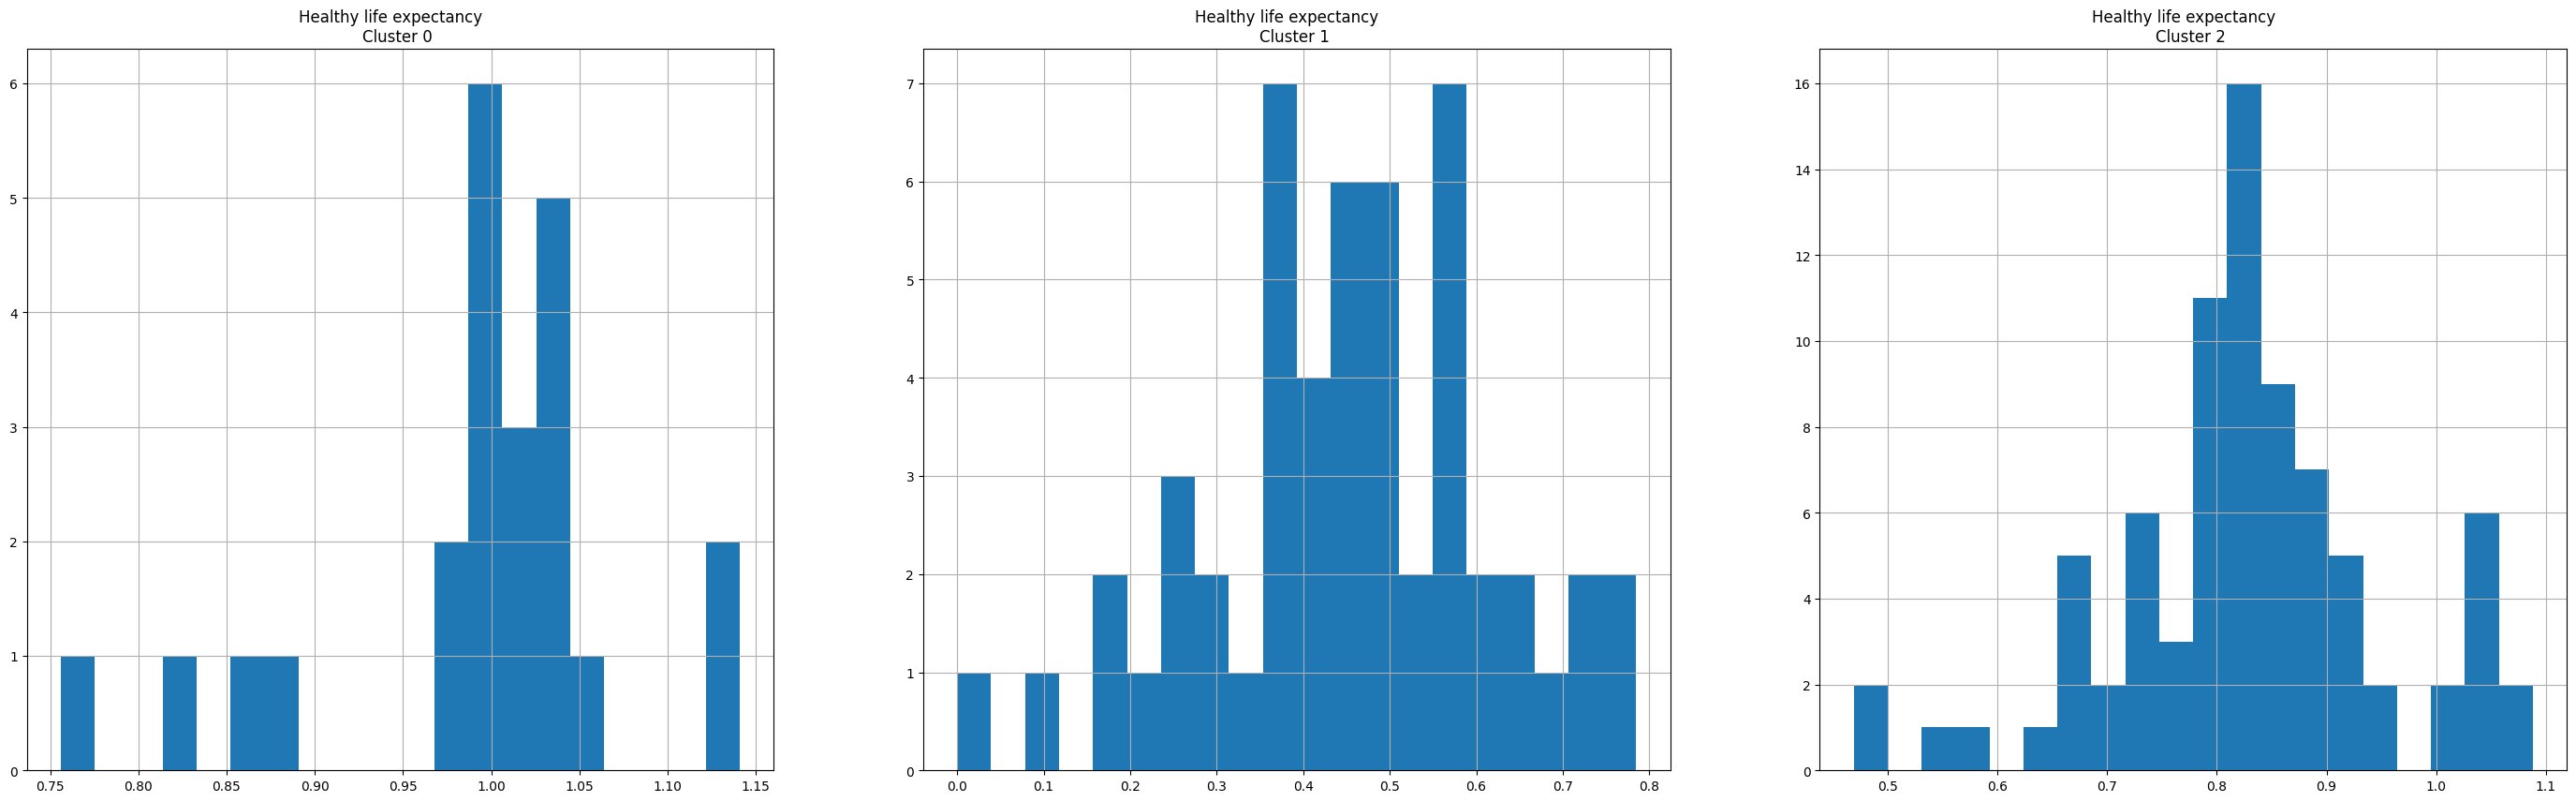

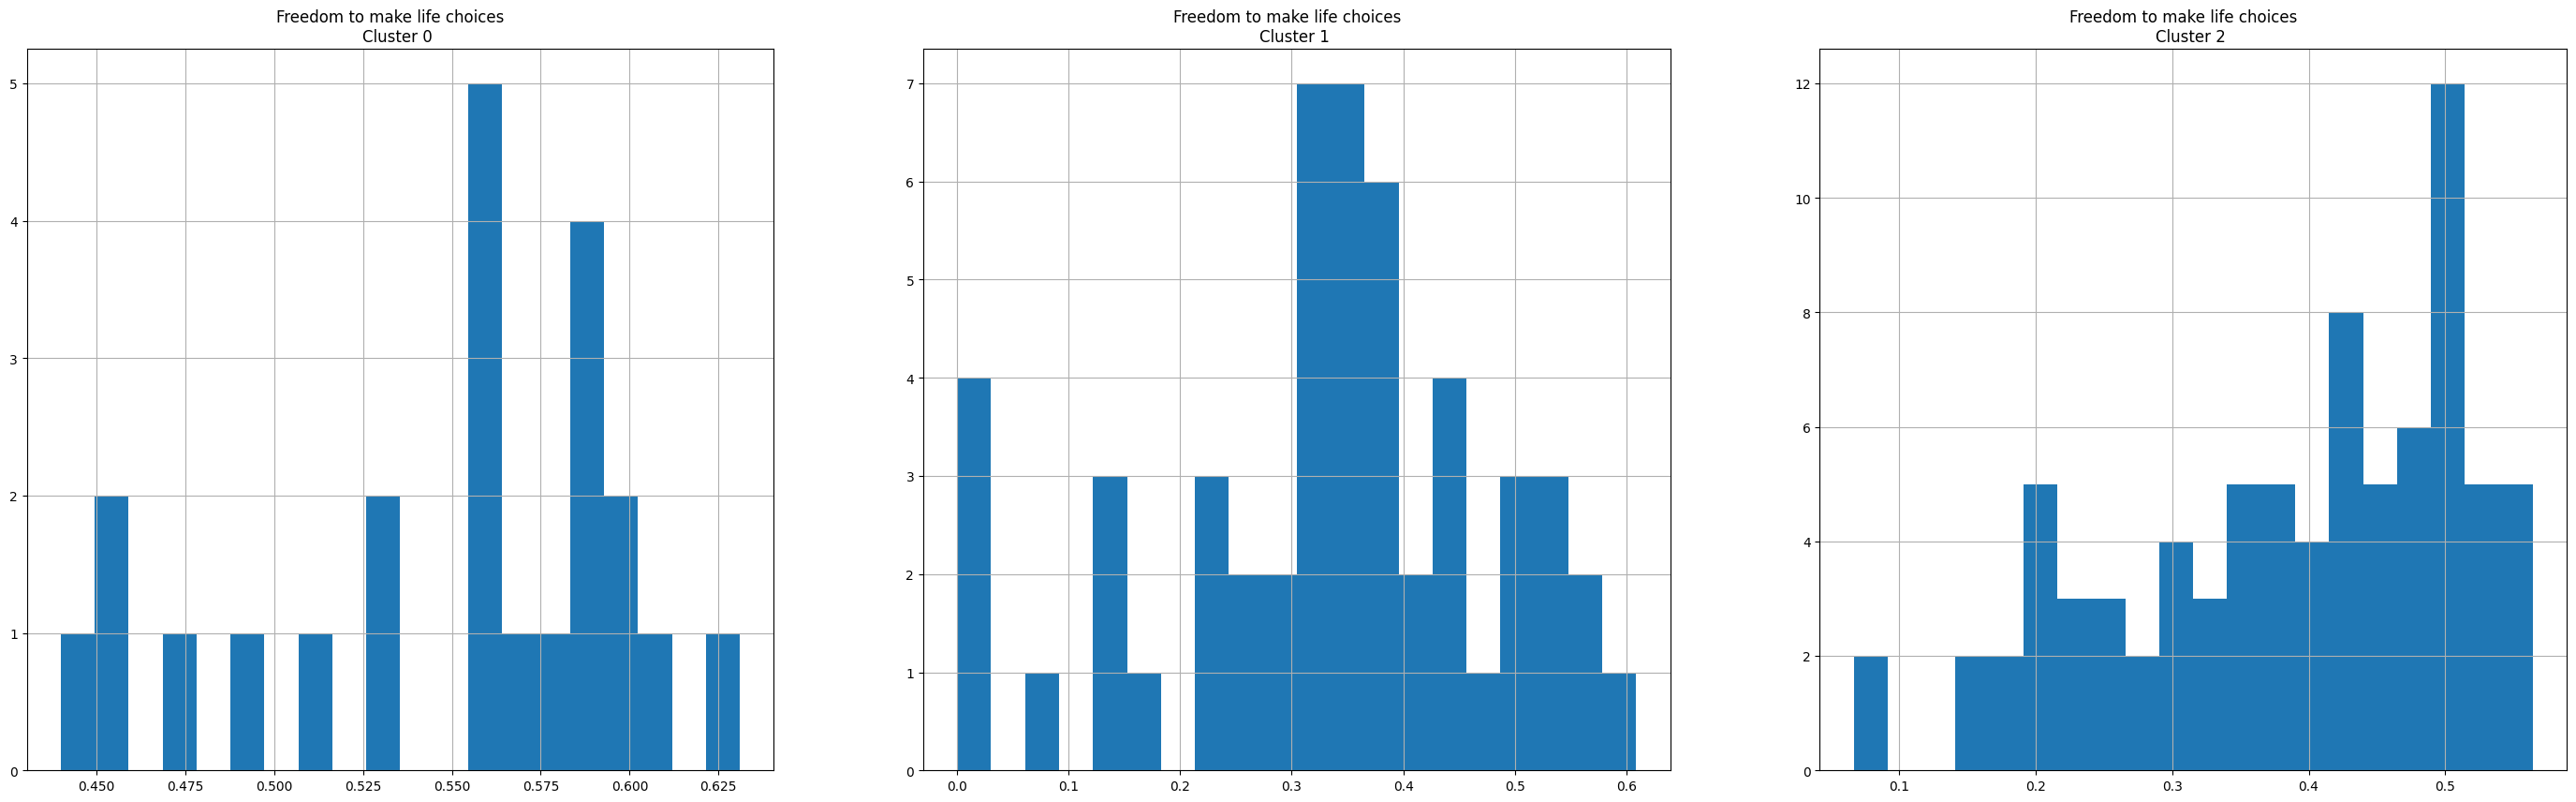

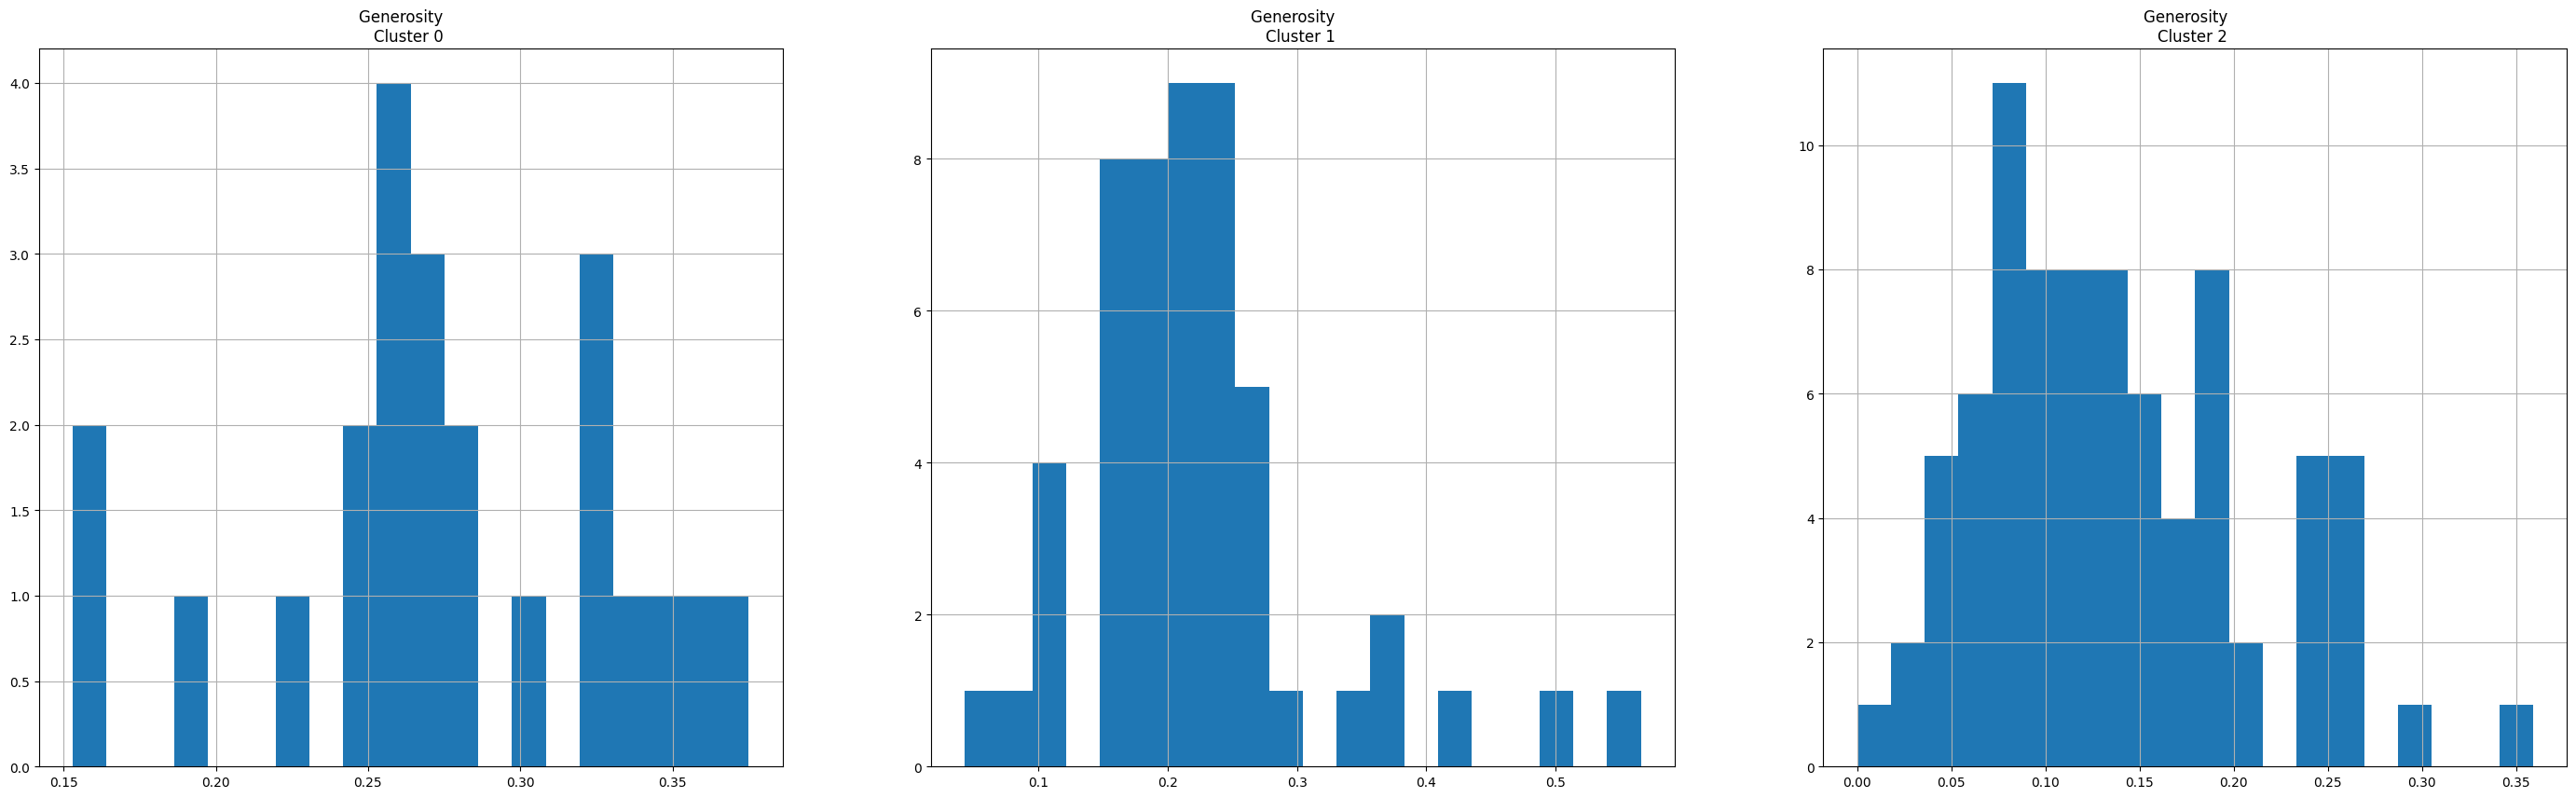

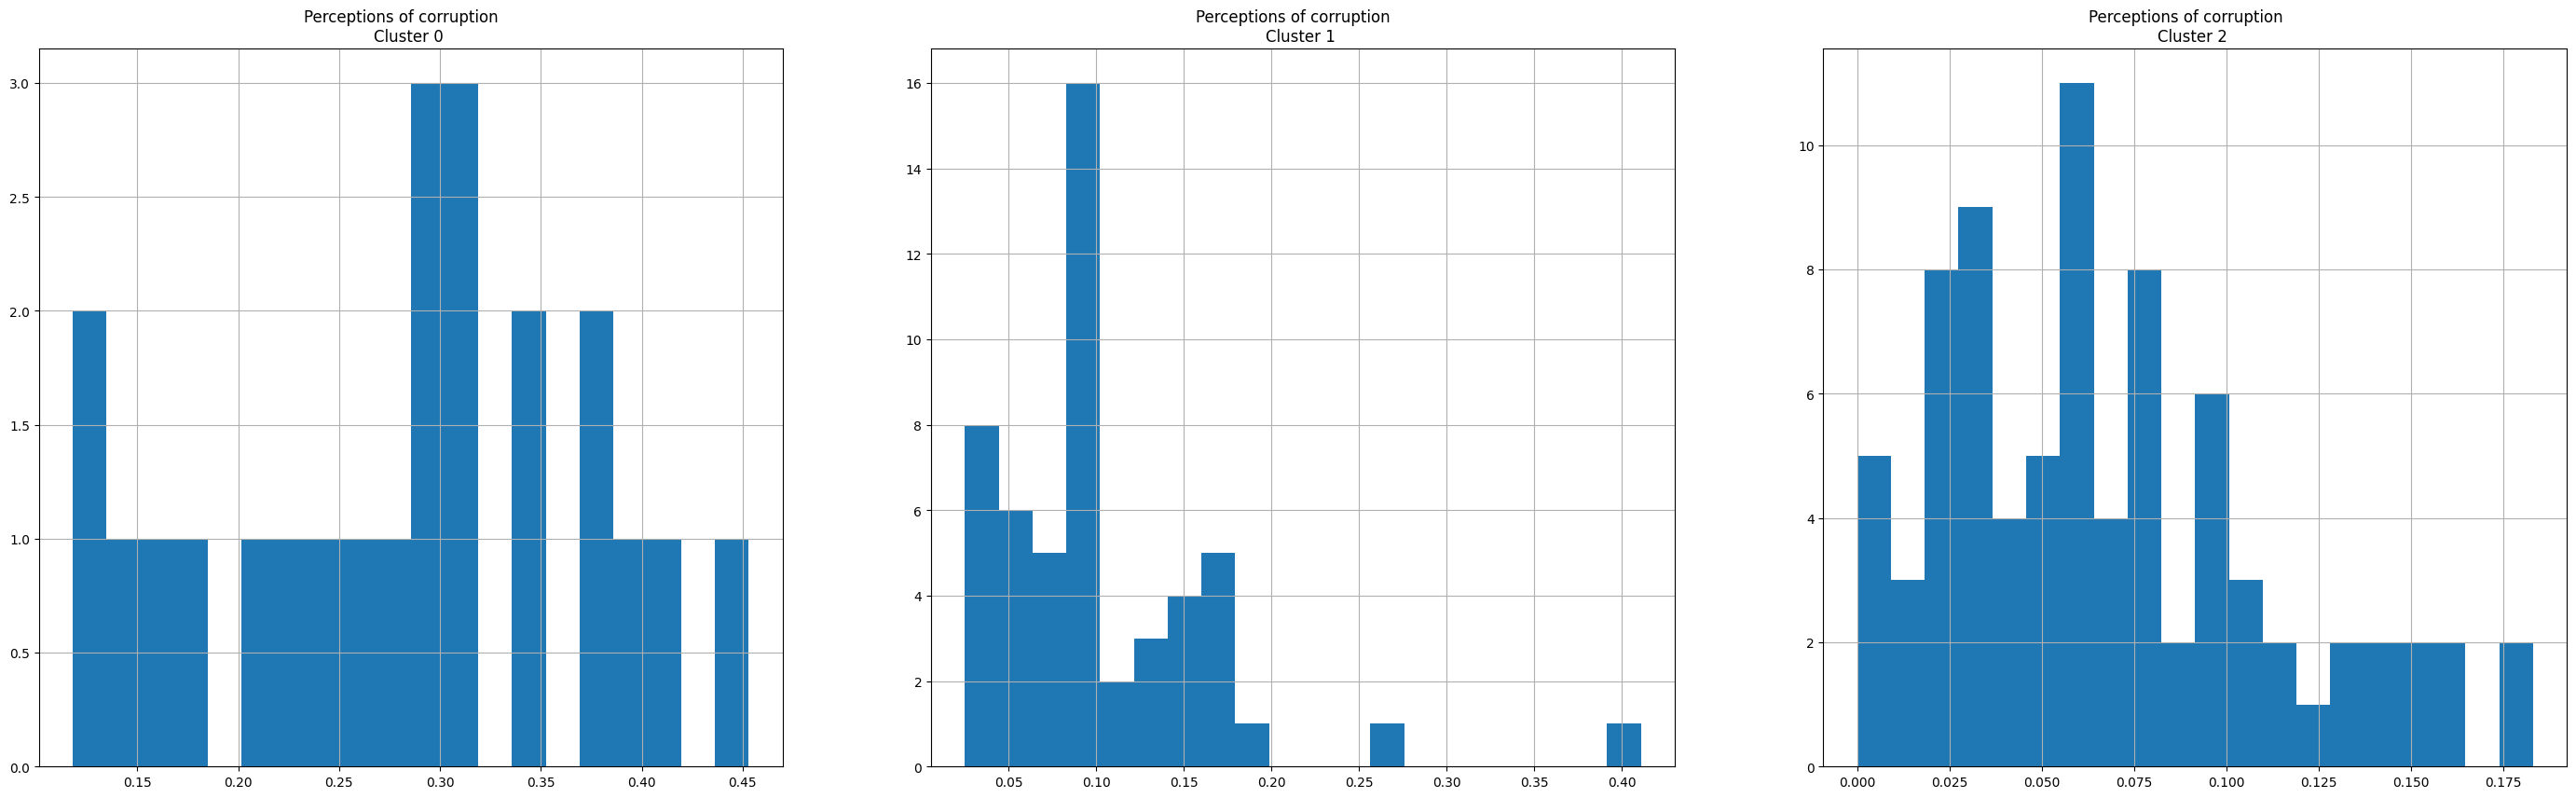

In [89]:
# Plot the histogram of various clusters
for i in df_seg.columns: # all cols in data
  plt.figure(figsize = (35, 10))
  for j in range(3): # for each cluster
    plt.subplot(1,3,j+1)
    cluster = happy_df_cluster[happy_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i, j))

  plt.show()
    #shows distributions in each cluster



MINI CHALLENGE #5:
- Try the same model with 4 clusters

# TASK #10: VISUALIZE THE CLUSTERS

In [90]:
# Plot the relationship between cluster and score

fig = px.scatter(happy_df_cluster, x = 'cluster', y = "Score",
           size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(
    title_text = 'Happiness Score vs Cluster'
)
fig.show()

In [91]:
# Plot the relationship between cluster and GDP

fig = px.scatter(happy_df_cluster, x='cluster', y='GDP per capita',
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='GDP vs Clusters'
)
fig.show()

In [94]:
import plotly.express as px

# Create the 3D scatter
fig = px.scatter_3d(
    happy_df_cluster,
    x='GDP per capita',
    y='Perceptions of corruption',
    z='Healthy life expectancy',
    size='Score',
    color='cluster',
    hover_name='Country or region',
    color_continuous_scale='Portland',
    title='Clusters based Impact of Economy, Corruption and Life Expectancy on Happiness Scores of Nations'
)

# Highlight Iran
iran = happy_df_cluster[happy_df_cluster['Country or region'] == 'Iran']
fig.add_scatter3d(
    x=iran['GDP per capita'],
    y=iran['Perceptions of corruption'],
    z=iran['Healthy life expectancy'],
    mode='markers+text',
    marker=dict(size=12, color='red', symbol='diamond'),
    text=iran['Country or region'],
    textposition='top center',
    name='Iran (Highlighted)'
)

# Label axes
fig.update_layout(
    scene=dict(
        xaxis_title='GDP per capita',
        yaxis_title='Corruption',
        zaxis_title='Life Expectancy'
    ),
    coloraxis_colorbar=dict(title='Cluster'),
    height=650
)

fig.show()


MINI CHALLENGE #6:
- Plot the similar type of visualization having 'Generosity' instead of 'Healthy life expectancy'

In [93]:
# Visualizing the clusters geographically
data = dict(type = 'choropleth',
           locations = happy_df_cluster["Country or region"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = happy_df_cluster['cluster'],
           text = happy_df_cluster["Country or region"],
           colorbar = {'title':'Clusters'})

layout = dict(title = 'Geographical Visualization of Clusters',
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)